![alt text](iSalud_Covecare.png 'Logo')

Este notebook se realizó tomando como base:
- https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution
- https://www.kaggle.com/sulianova/eda-cardiovascular-data

## EDA de datos de enfermedades cardiovasculares

El dataset contiene 70.000 registros de pacientes en 12 variables o _features_ (edad, sexo, systolic blood pressure, diastolic blood pressure, and etc). La clase "cardio" toma el valor 1 cuando el paciente tuvo una enfermedad cardiovascular y 0 si el paciente es saludable.

#### Descripción de los datos

Hay 3 tipos de variablesut features:

- *Objetivas*: factual information;
- *caracteristica de examen*: results of medical examination;
- *subjetivas*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

### Analisis inicial

In [1]:
import pandas as pd  #importamos el modulo pandas, y lo vamos a llamar pd
import seaborn as sns  # importamos el modulo seaborn, y lo llamamos sns
from matplotlib import pyplot as plt

df = pd.read_csv(
    "https://github.com/matog/iSalud-IntroCienciaDeDatos/raw/main/cardio_train.zip", sep=";"
)  # Leemos el dataset llamado cardio_train, e indicamos que la separación de los datos se hace con ;

In [ ]:
df.shape

(70000, 13)

In [ ]:
df.shape[0] # Como shape tiene dos argumentos, podemos imprimir cada uno indicando la posición

70000

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.00,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.00,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.00,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.00,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.00,100,60,1,1,0,0,0,0


#### Análisis univariado
Para comenzar a entender los datos, primero necesitamos saber que tipo de datos son. Esto se realiza con la función `info()`:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Todas las variables o _features_ son numéricas, 12 _integers_ y 1 número decimal (weight). La segunda columna nos da una idea del tamaño del dataset y cuantas observaciones no contienen valores nulos. Podemos utilizar `describe()` para mostrar algunas estadísticas como `min`, `max`, `mean`,`std` para cada variable (numérica):

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,"70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00","70,000.00"
mean,"49,972.42","19,468.87",1.35,164.36,74.21,128.82,96.63,1.37,1.23,0.09,0.05,0.80,0.50
std,"28,851.30","2,467.25",0.48,8.21,14.40,154.01,188.47,0.68,0.57,0.28,0.23,0.40,0.50
min,0.00,"10,798.00",1.00,55.00,10.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,"25,006.75","17,664.00",1.00,159.00,65.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00
50%,"50,001.50","19,703.00",1.00,165.00,72.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00
75%,"74,889.25","21,327.00",2.00,170.00,82.00,140.00,90.00,2.00,1.00,0.00,0.00,1.00,1.00
max,"99,999.00","23,713.00",2.00,250.00,200.00,"16,020.00","11,000.00",3.00,3.00,1.00,1.00,1.00,1.00


#### Nan Values - Valores nulos


Verificamos la cantidad de valores nulos que tiene le DF


In [ ]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Como muestra la salida anterior, no hay valores nulos en el DF. Pero para hacer mas interesante la práctica, vamos a reemplazar algunos valores de la columna `height`, seleccionados al azar, por `na`

In [ ]:
import random
import numpy as np

random.seed(3)
null_values = random.sample(range(df.shape[0]), 7)

In [ ]:
null_values

[31190, 17094, 48490, 62135, 8588, 1725, 61503]

In [ ]:
df.loc[df.index.isin(null_values),'height'] = np.nan

In [ ]:
df['height'].isna().sum()

7

In [ ]:
df.loc[df['height'].isna()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1725,2441,18399,1,NaN,71.00,120,70,1,1,0,0,1,0
8588,12257,15514,1,NaN,65.00,120,70,1,1,0,0,0,0
17094,24426,16177,1,NaN,80.00,140,90,1,1,0,0,1,1
31190,44531,21934,1,NaN,78.00,130,80,1,1,0,0,1,0
48490,69238,21718,1,NaN,66.00,120,80,1,1,0,0,1,1
61503,87816,17375,1,NaN,110.00,110,60,1,3,0,0,0,0
62135,88725,21243,1,NaN,68.00,120,80,1,1,0,0,1,1


Reemplazamos los valores `nan` por el promedio de la columna `height`

In [ ]:
height_mean = df['height'].mean()

In [ ]:
height_mean

164.35980740931237

In [ ]:
df.loc[df['height'].isna(),'height'] = height_mean

In [ ]:
# Verificamos que el reemplazo haya sido exitoso
df.loc[df['id']==69238]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
48490,69238,21718,1,164.36,66.00,120,80,1,1,0,0,1,1


In [ ]:
pd.options.display.float_format = "{:,.2f}".format # Convertimos todos los float a dos decimales

#### Reenombramos columnas

In [ ]:
# df.rename(columns={
#     "age": "edad",
#     "gender": "sexo",
#     "height": "altura",
#     "weight": "peso",
#     "ap_hi":"sistolica",
#     "ap_lo":"diastolica",
#     "cholesterol":"colesterol",
#     "gluc":"glucosa",
#     "smoke":"fumador",
#     "alco":"alcohol",
#     "active":"actividad_fisica",
#     "cardio":"cardiaco",
# }, inplace = True)

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168.00,62.00,110,80,1,1,0,0,1,0
1,1,20228,1,156.00,85.00,140,90,3,1,0,0,1,1
2,2,18857,1,165.00,64.00,130,70,3,1,0,0,0,1
3,3,17623,2,169.00,82.00,150,100,1,1,0,0,1,1
4,4,17474,1,156.00,56.00,100,60,1,1,0,0,0,0


In [ ]:
df['active'].value_counts()

1    56261
0    13739
Name: active, dtype: int64

Convertimos `age`, expresada en dias, en años.

In [ ]:
df['age_year'] = round(df['age']/365)

Asignamos valores desde un diccionario a las escalas

- Alternativa I:

In [ ]:
dict = {1: 'normal', 2: 'above normal', 3: 'well above normal'}
df['cholesterol'] = df['cholesterol'].map(dict)

dict = {1: 'CVD', 0: 'No CVD'}
df['cardio'] = df['cardio'].map(dict)

- Alternativa II

In [ ]:
cols = ['cholesterol', 'gluc', 'smoke', 'alco', 'active']
dict = {1: 'normal', 2: 'above normal', 3: 'well above normal'}

# Iteramos por la lista de variables a las cuales le reemplazamos el valor
for col in cols:
    df[col] = df[col].map(dict)

- Alternativa III

In [ ]:
def replace_dict(cols,dict):
    for col in cols:
        print(dict)
        df[col] = df[col].map(dict)

In [ ]:
col_cg = ['cholesterol', 'gluc']
dict_cg = {1: 'normal', 2: 'above normal', 3: 'well above normal'}

col_saa = ['smoke', 'alco', 'active']
dict_saa = {0:'No', 1:'Yes'}

replace_dict(col_cg,dict_cg)
replace_dict(col_saa,dict_saa)

{1: 'normal', 2: 'above normal', 3: 'well above normal'}
{1: 'normal', 2: 'above normal', 3: 'well above normal'}
{0: 'No', 1: 'Yes'}
{0: 'No', 1: 'Yes'}
{0: 'No', 1: 'Yes'}


La edad(`age`) está medida en días, la altura(`height`) en centímetros. 
Vamos a analizar como se compartan las variables según el valor de la clase objetivo.

Por ejemplo, a que edad el número de personas con CVD es mayor al número de personas sin CVD?

In [ ]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_year'],
      dtype='object')

<AxesSubplot:xlabel='years', ylabel='count'>

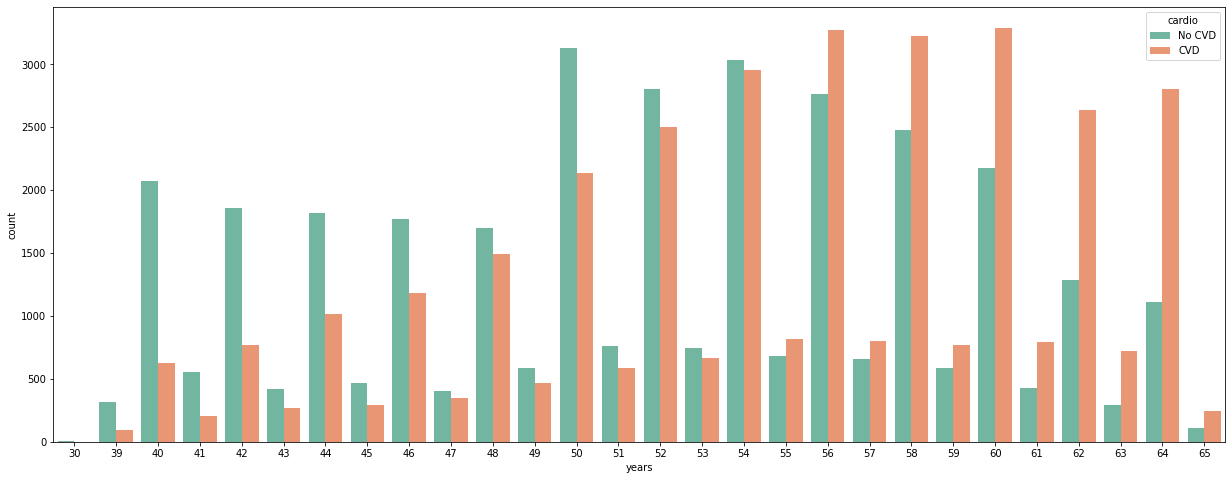

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 21, 8


df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data=df, palette="Set2")

Se observa qeu las personas mayores de 55 años se encuentran más expuestas al CVD.
En la tabla podemos ver qeu existen _outliers_ en `ap_hi`, `ap_lo`, `weight` y `height`. Trabajaremos con esas observaciones mas adelante.

In [ ]:
# Seleccionamos las columnas object
df_categorical = df.select_dtypes(include=['object']) # También se puede utilizar EXCLUDE
# sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,years
0,0,18393,2,168.00,62.00,110,80,NaN,NaN,NaN,NaN,NaN,No CVD,50.00,50
1,1,20228,1,156.00,85.00,140,90,NaN,NaN,NaN,NaN,NaN,CVD,55.00,55
2,2,18857,1,165.00,64.00,130,70,NaN,NaN,NaN,NaN,NaN,CVD,52.00,52
3,3,17623,2,169.00,82.00,150,100,NaN,NaN,NaN,NaN,NaN,CVD,48.00,48
4,4,17474,1,156.00,56.00,100,60,NaN,NaN,NaN,NaN,NaN,No CVD,48.00,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168.00,76.00,120,80,NaN,NaN,NaN,NaN,NaN,No CVD,53.00,53
69996,99995,22601,1,158.00,126.00,140,90,NaN,NaN,NaN,NaN,NaN,CVD,62.00,62
69997,99996,19066,2,183.00,105.00,180,90,NaN,NaN,NaN,NaN,NaN,CVD,52.00,52
69998,99998,22431,1,163.00,72.00,135,80,NaN,NaN,NaN,NaN,NaN,CVD,61.00,61


##### Agrupamientos

In [ ]:
df['active'].value_counts()

Series([], Name: active, dtype: int64)

In [ ]:
# df.groupby(['gender','active']).sum()
df.groupby(['active']).sum()
# df.groupby(['gender','active']).agg({'height':'mean', 'smoke':'sum'})

,id,age,gender,height,weight,ap_hi,ap_lo,age_year,years
active,,,,,,,,,


In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,years
0,0,18393,2,168.00,62.00,110,80,NaN,NaN,NaN,NaN,NaN,No CVD,50.00,50
1,1,20228,1,156.00,85.00,140,90,NaN,NaN,NaN,NaN,NaN,CVD,55.00,55
2,2,18857,1,165.00,64.00,130,70,NaN,NaN,NaN,NaN,NaN,CVD,52.00,52
3,3,17623,2,169.00,82.00,150,100,NaN,NaN,NaN,NaN,NaN,CVD,48.00,48
4,4,17474,1,156.00,56.00,100,60,NaN,NaN,NaN,NaN,NaN,No CVD,48.00,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168.00,76.00,120,80,NaN,NaN,NaN,NaN,NaN,No CVD,53.00,53
69996,99995,22601,1,158.00,126.00,140,90,NaN,NaN,NaN,NaN,NaN,CVD,62.00,62
69997,99996,19066,2,183.00,105.00,180,90,NaN,NaN,NaN,NaN,NaN,CVD,52.00,52
69998,99998,22431,1,163.00,72.00,135,80,NaN,NaN,NaN,NaN,NaN,CVD,61.00,61


In [ ]:
df.groupby(['gender','active']).agg(
    **{
        'Smoke Sum': ('smoke', 'sum'),
        'Height mean': ('height', 'mean')
    })

,,Smoke Sum,Height mean
gender,active,,


In [ ]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,years
69995,99993,19240,2,168.00,76.00,120,80,NaN,NaN,NaN,NaN,NaN,No CVD,53.00,53
69996,99995,22601,1,158.00,126.00,140,90,NaN,NaN,NaN,NaN,NaN,CVD,62.00,62
69997,99996,19066,2,183.00,105.00,180,90,NaN,NaN,NaN,NaN,NaN,CVD,52.00,52
69998,99998,22431,1,163.00,72.00,135,80,NaN,NaN,NaN,NaN,NaN,CVD,61.00,61
69999,99999,20540,1,170.00,72.00,120,80,NaN,NaN,NaN,NaN,NaN,No CVD,56.00,56


In [ ]:
porotos = [-np.inf, 100,130,150, 180, np.inf]
etiquetas = ['De 0-100','De 100-130', 'De 130-150','De 150-180','más de 180'] # Las etiquetas tienen que ser una menos que los bins
df['range height'] = pd.cut(df['height'], labels = etiquetas, bins = porotos, include_lowest=True)
df.groupby(['range height','gender','active'])['height'].count().reset_index()

,range height,gender,active,height


#### Analisis bivariado

Es útil mostrar las variables categóricas según el valor de la _clase objetivo_

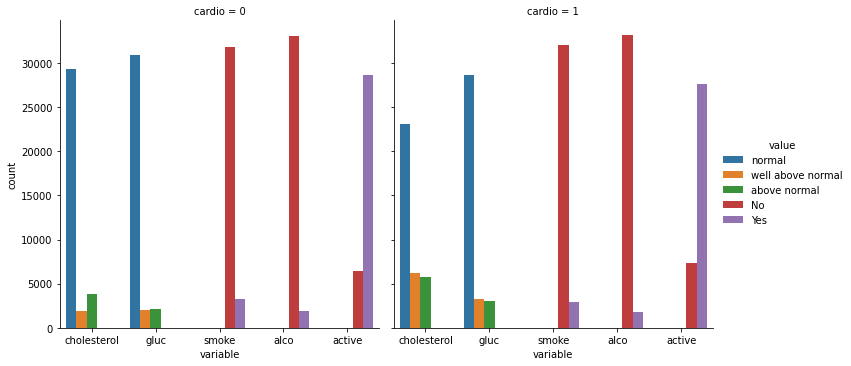

In [ ]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

Es claro que los pacientes con CVD tiene niveles mayores de colesterol y glucosa en sangre. Y en términos generales, con menos actividad física.

Para poder saber si el valor "1" se refiere a mujeres o hombres (en la columna `gender`), vamos a calcular la media de la altura por sexo. Suponemos que los hombres, en promedio, son mas altos que las mujeres.

In [ ]:
df.groupby('gender')['height'].mean()

gender
1    162.055434
2    169.251915
Name: height, dtype: float64

El promedio para el valor "2" es mayor que el de "1". Por lo tanto, "1" representa a las mujeres.

Veamos como se distribuyen en el dataset:

In [ ]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Reemplazamos, en la función desarrollada mas arriba, el código de `gender` por `male` y `female`.

In [ ]:
col_gen = ['gender']
dict_gen = {1:'Female', 2:'Male'}

replace_dict(col_gen,dict_gen)

{1: 'Female', 2: 'Male'}


Quién consume mas frecuentemente alcohol? Mujeres u hombres?

In [ ]:
df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

Por lo tanto, los hombres consumen en promedio alcohol de manera mas frecuente que las mujeres.

Ahora, obtenemos las participaciones relativas:

In [ ]:
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

Para obtener como se distribuye la _clase objetivo_ entre hombres y mujeres, también se puede utilizar `crosstab`

In [ ]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.33,0.17
1,0.32,0.18


### Cleaning Data / Limpieza de la base

La base contiene filas con `NA`s o `missing values`?

In [ ]:
df.isnull().values.any() # NAs en todo el dataset
df['cholesterol'].isnull().sum() # NAs en la columna cholesterol

0

Si observamos detenidamente las columnas `height` y `weight`, notamos que la altura mínima es de 55cm  y el peso mínimo es de 10kg. Podemos inferir que es un error, dado que la edad mínima es 29 años (10798 dias). 

Por otro lado, la altura máxima es 250cm y el peso máximo es 200kg, que sería irrelevante si generalizamos los datos.

Para lidiar con estos errores, borramos los _outliers_.

In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,BMI
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,49895.698065,19468.719979,1.347311,164.554854,73.426805,125.770526,81.046307,1.350953,1.220229,0.085631,0.051877,0.803648,0.488228,53.338798,27.170628
std,28840.467755,2460.510296,0.476120,6.830174,11.614806,13.761847,8.239157,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866,6.746864,4.404588
min,0.000000,10798.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,16.049383
25%,24867.500000,17677.250000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,49902.500000,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,26.259585
75%,74745.750000,21321.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,29.752066
max,99999.000000,23713.000000,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000,46.666667


Vamos a borrar el peso y la altura que caen por debajo del 2.5% o por encima del 97.5% del rango de la base.

In [ ]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In addition, in some cases diastolic pressure is higher than systolic, which is also  incorrect. How many records are inaccurate in terms of blood pressure?

In [ ]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [ ]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


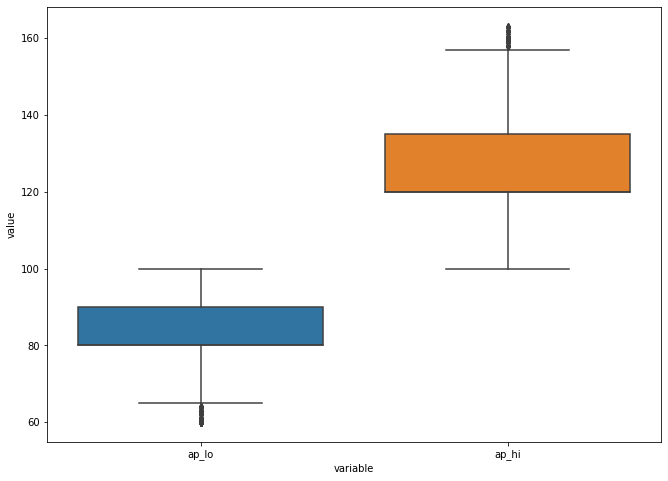

In [ ]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

#### Análisis multivariado

Puede resultar de utilidad utilizar una matriz de correlación:

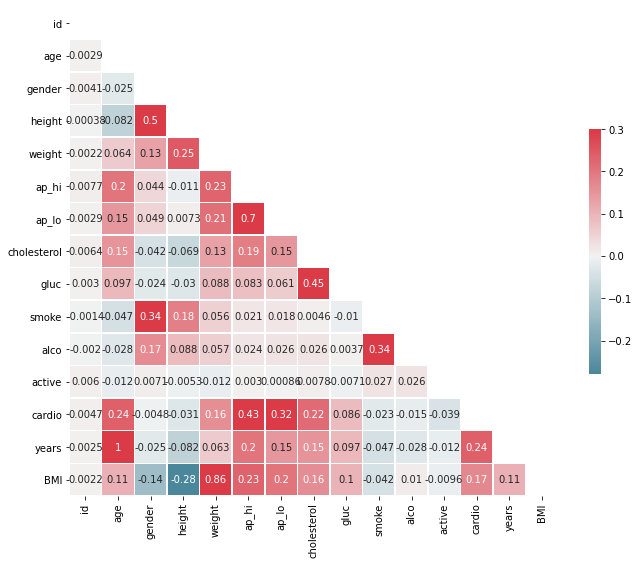

In [ ]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Como podemos observar, `age` y `cholesterol` tienen un impacto significativo, pero no están altamente correlacionados con la _clase objetivo_

Vamos a crear un `violinplot` para mostrar la distribución de la altura en los diferentes sexos. 

Tomando sólo el valor medio de la altura y el peso para cada valor de la variable `gender` puede no ser suficiente para determinar si '1' equivale a hombre o mujer.

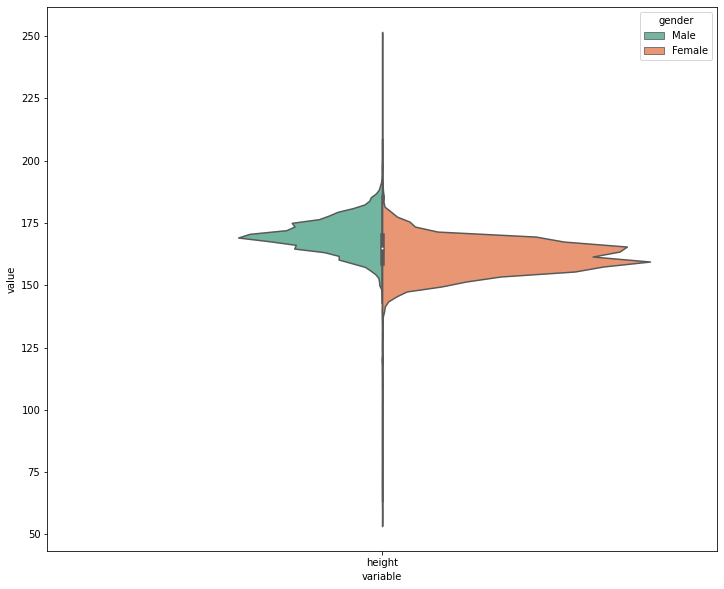

In [ ]:
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False,
    palette="Set2");

Vamos a crear una nueva variable: Body Mass Index (BMI) ó índice de masa muscular.

$$BMI = \frac {mass_{kg}} {height ^2_{m}},$$

y comparamos el promedio de BMI para las personas sanas con el promedio de BMI para personas enfermas.

(los valores normales de BMI se encuentran en 18.5 y 25)

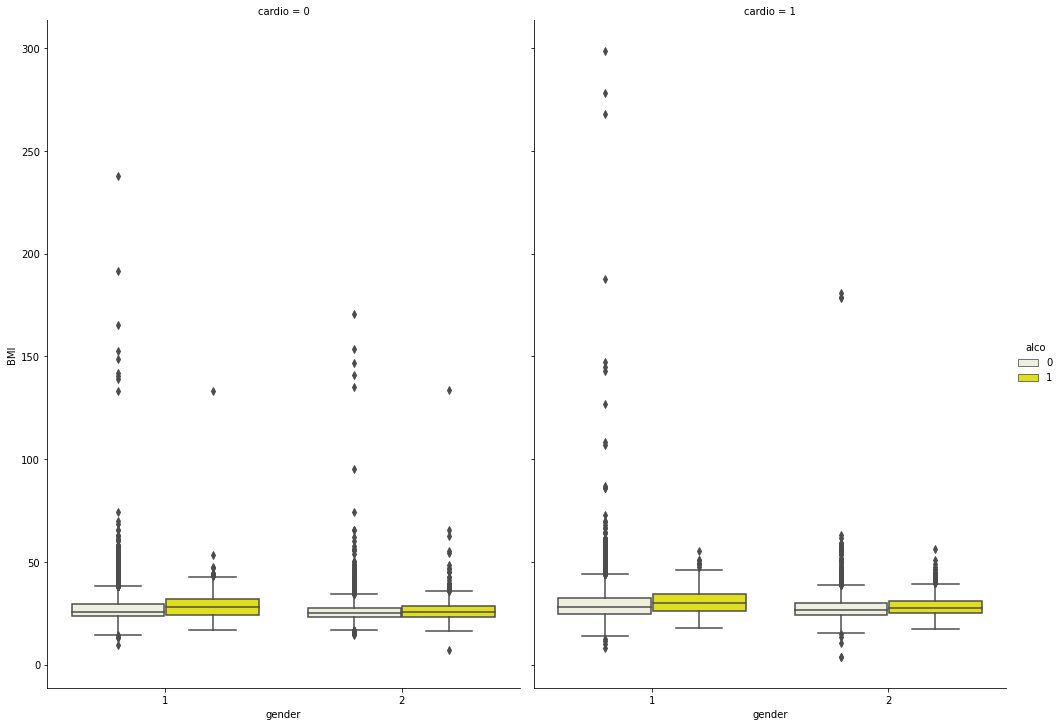

In [ ]:
df['BMI'] = df['weight'] / ((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);

Las mujeres que beben alcohol tienen un mayor riesgo de CVD que los hombres que consumen alochol, según su BMI.